In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import sys
import csv
import functools
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re
import string
from vigipy import *
import unittest
from vigipy import bcpnn, gps, ror, rfet, prr, convert, LongitudinalModel

In [2]:
# for set 1

In [3]:
dfRaw = pd.read_pickle("./dfResultsRFo")

In [4]:
# creating df to input into the DPA model
df = pd.DataFrame(columns=["AE"])
df["AE"] = dfRaw["PREDICTED"]

countList = []
n=0
while n < 47367:
    countList.append(1)
    n += 1

df["count"] = countList
df["name"] = dfRaw["STD_DEVICE"]
df["date"] = pd.to_datetime(dfRaw["DATE_RECEIVED"].astype(str))

In [5]:
df.head()

,AE,count,name,date
0,0,1,StJUDE_DURATA,2019-11-13
1,0,1,StJUDE_QUARTET,2019-11-27
2,0,1,MEDTRONIC_SPRINT_QUATTRO_SECURE_MRI,2020-07-07
3,0,1,StJUDE_DURATA,2017-06-28
4,0,1,MEDTRONIC_VIVA,2016-08-09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47367 entries, 0 to 47366
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   AE      47367 non-null  object        
 1   count   47367 non-null  int64         
 2   name    47367 non-null  object        
 3   date    47367 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.8+ MB


<ipython-input-7-2680671302ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Quarter'] = df_1['date'].dt.to_period('Q')


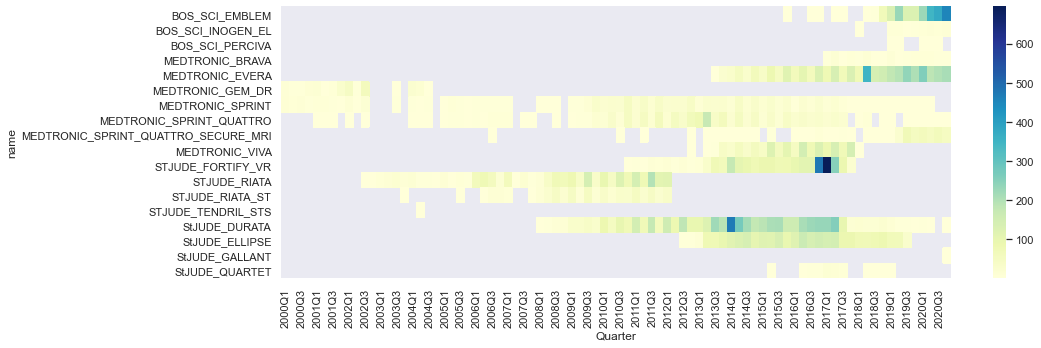

In [7]:
# plotting predicted adverse MDR counts
df_1 = df.loc[df['AE']=="1"]
df_1['Quarter'] = df_1['date'].dt.to_period('Q')
dfPT = df_1.pivot_table(values='count', index = 'name', columns= 'Quarter', aggfunc= np.sum)

sns.set(rc={'figure.figsize':(15,5)})
ax = sns.heatmap(dfPT,cmap="YlGnBu")

In [8]:
LM = LongitudinalModel(df, 'Q')
LM.run_disjoint(gps, ranking_statistic = 'quantile')

/Users/inba/opt/anaconda3/lib/python3.8/vigipy/GPS/GPS.py:286: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(term))
/Users/inba/opt/anaconda3/lib/python3.8/vigipy/GPS/GPS.py:286: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(term))
/Users/inba/opt/anaconda3/lib/python3.8/vigipy/GPS/GPS.py:286: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(term))
/Users/inba/opt/anaconda3/lib/python3.8/vigipy/GPS/GPS.py:286: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(term))
/Users/inba/opt/anaconda3/lib/python3.8/vigipy/GPS/GPS.py:286: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(term))
/Users/inba/opt/anaconda3/lib/python3.8/vigipy/GPS/GPS.py:286: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(term))
/Users/inba/opt/anaconda3/lib/python3.8/vigipy/GPS/GPS.py:286: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(term))

In [9]:
LM.results[77][1].signals

,Product,Adverse Event,Count,Expected Count,quantile,count/expected,product margin,event margin,fdr,FNR,Se,Sp,posterior_probability
0,BOS_SCI_EMBLEM,1,230.0,123.201856,1.656017,1.866855,295.0,540.0,0.369875,0.695133,0.742902,0.350137,1.168943e-17
1,StJUDE_DURATA,0,185.0,111.232019,1.455785,1.663190,191.0,753.0,0.382104,0.687409,0.546363,0.451909,1.694340e-10
2,MEDTRONIC_EVERA,1,195.0,121.113689,1.415179,1.610057,290.0,540.0,0.422981,0.415421,0.907055,0.339893,6.452386e-10
3,MEDTRONIC_SPRINT_QUATTRO_SECURE_MRI,0,252.0,161.315545,1.396646,1.562156,277.0,753.0,0.429867,0.631739,0.448115,0.551753,3.712744e-11
4,MEDTRONIC_SPRINT_QUATTRO,0,21.0,12.229698,1.085867,1.717131,21.0,753.0,0.491276,0.604162,0.349868,0.625748,2.362910e-02
5,StJUDE_ELLIPSE,1,68.0,55.127610,0.988731,1.233502,132.0,540.0,0.491084,0.000000,1.000000,0.101816,5.978263e-02
6,StJUDE_QUARTET,0,15.0,8.735499,0.983609,1.717131,15.0,753.0,0.403500,0.624194,0.644654,0.446182,5.625150e-02
7,MEDTRONIC_SPRINT,0,20.0,13.394432,0.947845,1.493158,23.0,753.0,0.569217,0.588022,0.253941,0.689058,7.698946e-02
8,BOS_SCI_INOGEN_EL,0,30.0,22.712297,0.929405,1.320870,39.0,753.0,0.550859,0.513228,0.088254,0.993913,1.017175e-01
9,StJUDE_ELLIPSE,0,64.0,76.872390,0.669657,0.832549,132.0,753.0,0.438225,0.656150,0.551932,0.451909,9.433173e-01


In [10]:
L1 = []
L2 = []
L3 = []

DPAdf = pd.DataFrame(columns=['Date','Product','quantile'])

for timestamp, result in LM.results:
    for n in result.signals.index:
        if result.signals.loc[n,'Adverse Event'] == "1":
            L1.append(timestamp)
            L2.append(result.signals.loc[n,'Product'])
            L3.append(result.signals.loc[n,'quantile'])    

In [11]:
DPAdf['Date'] = L1
DPAdf['Product'] = L2
DPAdf['Quantile'] = L3

DPAdf['Quarter'] = pd.to_datetime(DPAdf['Date']).dt.to_period('Q')
DPAdf.head()

,Date,Product,quantile,Quantile,Quarter
0,2000-03-31,MEDTRONIC_GEM_DR,NaN,0.633614,2000Q1
1,2000-03-31,MEDTRONIC_SPRINT,NaN,0.541226,2000Q1
2,2000-06-30,MEDTRONIC_SPRINT,NaN,0.522786,2000Q2
3,2000-06-30,MEDTRONIC_GEM_DR,NaN,0.463367,2000Q2
4,2000-09-30,MEDTRONIC_GEM_DR,NaN,0.494287,2000Q3


In [12]:
DPAPT = DPAdf.pivot('Product', 'Quarter', 'Quantile')
DPAPT.head()

Quarter,2000Q1,2000Q2,2000Q3,2000Q4,2001Q1,2001Q2,2001Q3,2001Q4,2002Q1,2002Q2,...,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4
Product,,,,,,,,,,,,,,,,,,,,,
BOS_SCI_EMBLEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.675151,1.403072,1.374947,1.656017,1.712548,2.100253,2.071662,1.823933,1.671756,1.622117
BOS_SCI_INOGEN_EL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.405065,0.315657,0.242827,0.290698,0.374052,0.763814,0.748168,0.552029
BOS_SCI_PERCIVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.230534,0.167203,NaN,NaN,0.205574,0.199241,0.167203,NaN
MEDTRONIC_BRAVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.307834,0.515335,0.790823,0.337450,0.735502,1.052899,0.877064,0.830125,0.693406,0.582577
MEDTRONIC_EVERA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.485587,1.448055,1.314039,1.415179,1.718043,1.759579,1.617647,1.453177,1.512502,1.426169


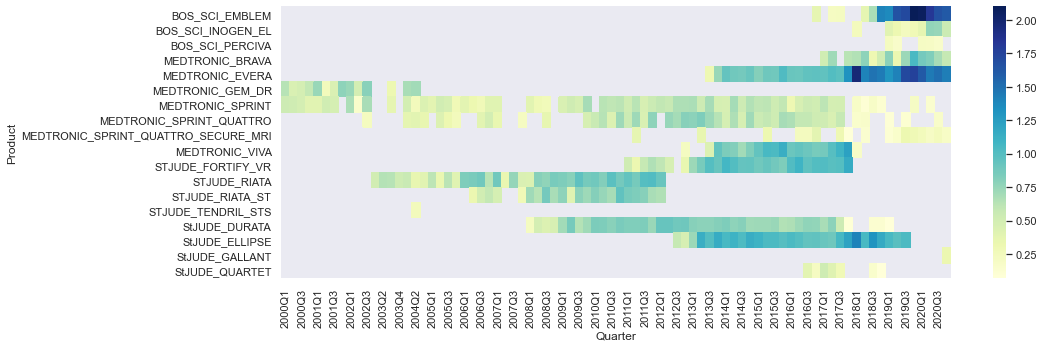

In [13]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.heatmap(DPAPT,cmap="YlGnBu")

In [14]:
# for set 2

In [15]:
dfRaw2 = pd.read_pickle("./dfResultsRFo2")

In [16]:
# creating df to input into the DPA model
df2 = pd.DataFrame(columns=["AE"])
df2["AE"] = dfRaw2["PREDICTED"]

countList = []
n=0
while n < 1975:
    countList.append(1)
    n += 1

df2["count"] = countList
df2["name"] = dfRaw2["STD_DEVICE"]
df2["date"] = pd.to_datetime(dfRaw2["DATE_RECEIVED"].astype(str))

<ipython-input-17-672f98313a40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_1['Quarter'] = df2_1['date'].dt.to_period('Q')


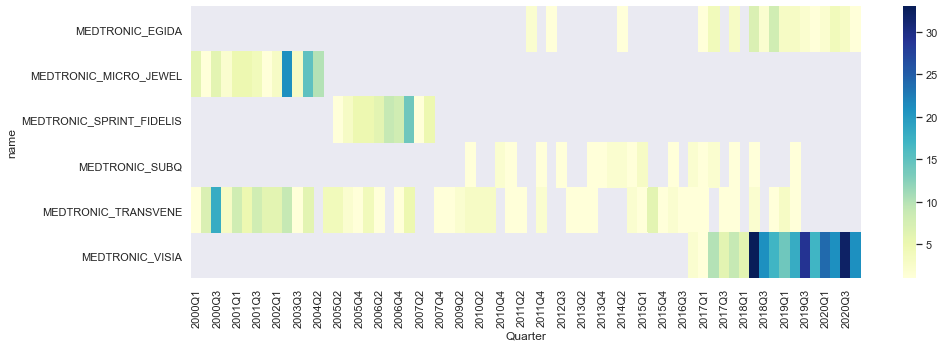

In [17]:
# plotting predicted adverse MDR counts
df2_1 = df2.loc[df2['AE']=="1"]
df2_1['Quarter'] = df2_1['date'].dt.to_period('Q')
df2PT = df2_1.pivot_table(values='count', index = 'name', columns= 'Quarter', aggfunc= np.sum)

sns.set(rc={'figure.figsize':(15,5)})
ax = sns.heatmap(df2PT,cmap="YlGnBu")

In [18]:
LM2 = LongitudinalModel(df2, 'Q')
LM2.run_disjoint(gps, ranking_statistic = 'quantile')

/Users/inba/opt/anaconda3/lib/python3.8/vigipy/GPS/GPS.py:286: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(term))
/Users/inba/opt/anaconda3/lib/python3.8/vigipy/GPS/GPS.py:286: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(term))
/Users/inba/opt/anaconda3/lib/python3.8/vigipy/GPS/GPS.py:286: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(term))
/Users/inba/opt/anaconda3/lib/python3.8/vigipy/GPS/GPS.py:286: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(term))
/Users/inba/opt/anaconda3/lib/python3.8/vigipy/GPS/GPS.py:286: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(term))
/Users/inba/opt/anaconda3/lib/python3.8/vigipy/GPS/GPS.py:286: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(term))
/Users/inba/opt/anaconda3/lib/python3.8/vigipy/GPS/GPS.py:286: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(term))

In [19]:
len(LM2.results)

84

In [20]:
print(LM2.results[1][0].quarter)
print(LM2.results[1][0].year)

2
2000


In [21]:
LM2.results[1][1].signals

,Product,Adverse Event,Count,Expected Count,quantile,count/expected,product margin,event margin,fdr,FNR,Se,Sp,posterior_probability
0,MEDTRONIC_TRANSVENE,0,7.0,7.0,0.483856,1.0,14.0,8.0,0.638099,5.235959e-01,0.500000,0.765088,0.599589
1,MEDTRONIC_TRANSVENE,1,7.0,7.0,0.483856,1.0,14.0,8.0,0.638099,3.233903e+06,1.000000,0.265088,0.599589
2,MEDTRONIC_MICRO_JEWEL,0,1.0,1.0,0.183036,1.0,2.0,8.0,0.676610,4.825344e-01,0.223397,1.000000,0.676610


In [22]:
LM2.results[1][1].signals["Adverse Event"][1]

'1'

In [23]:
L21 = []
L22 = []
L23 = []

DPAdf2 = pd.DataFrame(columns=['Date','Product','Quantile'])
   

In [24]:
# loop was changed due to inablilty to handle quarterly values w/o any signals

i = 0
while i < 84:
    if str(LM2.results[i][1]) != "None":
        for index in LM2.results[i][1].signals.index:
            if LM2.results[i][1].signals["Adverse Event"][index] == "1":
                L22.append(LM2.results[i][1].signals["Product"][index])
                L21.append(LM2.results[i][0])
                L23.append(LM2.results[i][1].signals["quantile"][index])
    i += 1
    

In [25]:
DPAdf2['Date'] = L21
DPAdf2['Product'] = L22
DPAdf2['Quantile'] = L23

DPAdf2['Quarter'] = pd.to_datetime(DPAdf2['Date']).dt.to_period('Q')
DPAdf2.head()

,Date,Product,Quantile,Quarter
0,2000-03-31,MEDTRONIC_MICRO_JEWEL,0.808891,2000Q1
1,2000-06-30,MEDTRONIC_TRANSVENE,0.483856,2000Q2
2,2000-09-30,MEDTRONIC_MICRO_JEWEL,0.752266,2000Q3
3,2000-09-30,MEDTRONIC_TRANSVENE,0.558269,2000Q3
4,2000-12-31,MEDTRONIC_MICRO_JEWEL,0.412143,2000Q4


In [26]:
DPAdf2.pivot('Product', 'Quarter', 'Quantile')

Quarter,2000Q1,2000Q2,2000Q3,2000Q4,2001Q1,2001Q2,2001Q3,2001Q4,2002Q1,2002Q3,...,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4
Product,,,,,,,,,,,,,,,,,,,,,
MEDTRONIC_EGIDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.240965,0.600086,0.435240,0.442691,NaN,NaN,0.319196,0.399291,0.405251,NaN
MEDTRONIC_MICRO_JEWEL,0.808891,NaN,0.752266,0.412143,0.672916,0.612566,0.554823,NaN,0.513286,0.919719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MEDTRONIC_SPRINT_FIDELIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MEDTRONIC_SUBQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.140008,NaN,NaN,NaN,NaN,NaN,NaN
MEDTRONIC_TRANSVENE,NaN,0.483856,0.558269,0.261454,0.404134,0.322363,0.429466,0.418104,0.375169,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MEDTRONIC_VISIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.968521,0.693219,0.769216,0.703278,0.787656,0.721345,0.798646,0.740531,0.806283,0.818763


In [27]:
#DPAdf2 = pd.DataFrame(DPAdf2.reset_index())
DPAPT2 = DPAdf2.pivot('Product', 'Quarter', 'Quantile')
DPAPT2.head()

Quarter,2000Q1,2000Q2,2000Q3,2000Q4,2001Q1,2001Q2,2001Q3,2001Q4,2002Q1,2002Q3,...,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4
Product,,,,,,,,,,,,,,,,,,,,,
MEDTRONIC_EGIDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.240965,0.600086,0.43524,0.442691,NaN,NaN,0.319196,0.399291,0.405251,NaN
MEDTRONIC_MICRO_JEWEL,0.808891,NaN,0.752266,0.412143,0.672916,0.612566,0.554823,NaN,0.513286,0.919719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MEDTRONIC_SPRINT_FIDELIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MEDTRONIC_SUBQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.140008,NaN,NaN,NaN,NaN,NaN,NaN
MEDTRONIC_TRANSVENE,NaN,0.483856,0.558269,0.261454,0.404134,0.322363,0.429466,0.418104,0.375169,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


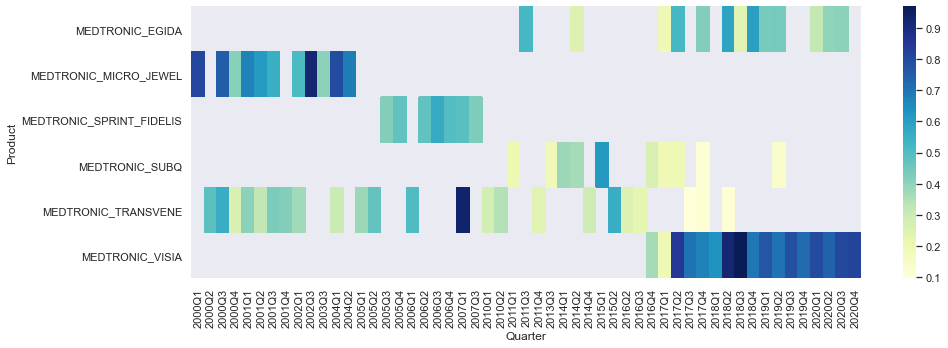

In [28]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.heatmap(DPAPT2,cmap="YlGnBu")